b'y=mx+c'
4.0
b'm:' 1.0266
b'c:' -0.0320525
b'Actual values of Y' [ 1.39999998  2.5999999   3.5         4.9000001   5.19999981]
b'predicted values of Y' [ 1.5078547   2.63711977  3.25308275  4.89565039  5.30629206]
0.130611


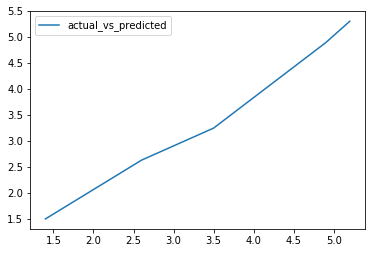

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.constant([1.5,2.6,3.2,4.8,5.2],name='a')
y=tf.constant([1.4,2.6,3.5,4.9,5.2],name='b')
z=tf.constant(1.0)
e=tf.constant("y=mx+c")
ms=tf.constant("m:")
mc=tf.constant("c:")
ac=tf.constant("Actual values of Y")
pc=tf.constant("predicted values of Y")

# MEAN OF X, Y
meanx = tf.reduce_mean(x)
meany = tf.reduce_mean(y)

   
# X-MEAN , Y-MEAN
varx=tf.Variable(x-meanx, name='varx')
vary=tf.Variable(y-meany, name='vary')
l=tf.size(x)
a=tf.subtract(l,1)
a=tf.cast(a,tf.float32)
#VS=X-MEAN SQUARE, SUM OF VS
vs=tf.square(varx)
sn=tf.reduce_sum(vs)
sm=tf.div(sn,a)

   
#COVARIENCE  OF X,Y
CV=tf.multiply(varx,vary)
cm=tf.reduce_sum(CV)
cv=tf.div(cm,a)


#calculation of m and c
m=tf.divide(cv,sm)
c=meany-(meanx*m)

#Predicted values of Y
p=tf.multiply(x,m)
pry=tf.add(p,c)    


#calculating root-mean-square-error
rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(y,pry)))
   
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
 
print(sess.run(e))
print(sess.run(a))
print(sess.run(ms),sess.run(m))
print(sess.run(mc),sess.run(c))

print(sess.run(ac),sess.run(y))
print(sess.run(pc),sess.run(pry))
print(sess.run(rms))

plt.plot(sess.run(y),sess.run(pry),label='actual_vs_predicted')
plt.legend()
plt.show()